In [3]:
import tensorflow

In [4]:
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import random as rand
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import shap
from sklearn.preprocessing import MinMaxScaler

## Import BA GPS data 

In [56]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\BA\BA_GPS_trips_all_features_apply_model.csv"
BA_GPS = pd.read_csv(path)

In [57]:
BA_GPS = BA_GPS.sort_index(axis=1)

In [59]:
BA_GPS = BA_GPS.drop(['transitTime (min)','Com_perZone_dest', 'Com_perZone_orig','Area_km2_x', 'Area_km2_y','DestinationLat', 'DestinationLon',
       'waitingTime (min)', 'walkTime (min)','Zone_x', 'Zone_y','Weekend','TripEndTime', 'TripStartTime','Agro_perZone_dest', 'Agro_perZone_orig', 
             'DestinationTaz', 'DeviceId', 'Ind_perZone_dest', 'Ind_perZone_orig','LINK_x', 'LINK_y','OriginLat', 'OriginLon', 'OriginTaz', 'Other_perZone_dest',
       'Other_perZone_orig', 'Population_x', 'Population_y','Serv_perZone_dest', 'Serv_perZone_orig','Taz_home',    'NSE','Other_perZone_perKM2_dest', 
    'Other_perZone_perKM2_orig','RoadDistance','Trip_EndTime_Period','Trip_StartTime_Period','Trip_EndTime_Period_Dawn','Trip_StartTime_Period_Dawn',
             
                                       ],axis=1)
BA_GPS.columns

KeyError: "['transitTime (min)', 'Com_perZone_dest', 'Com_perZone_orig', 'Area_km2_x', 'Area_km2_y', 'DestinationLat', 'DestinationLon', 'waitingTime (min)', 'walkTime (min)', 'Zone_x', 'Zone_y', 'Weekend', 'TripEndTime', 'TripStartTime', 'Agro_perZone_dest', 'Agro_perZone_orig', 'DestinationTaz', 'DeviceId', 'Ind_perZone_dest', 'Ind_perZone_orig', 'LINK_x', 'LINK_y', 'OriginLat', 'OriginLon', 'OriginTaz', 'Other_perZone_dest', 'Other_perZone_orig', 'Population_x', 'Population_y', 'Serv_perZone_dest', 'Serv_perZone_orig', 'Taz_home', 'NSE', 'Other_perZone_perKM2_dest', 'Other_perZone_perKM2_orig', 'RoadDistance', 'Trip_EndTime_Period', 'Trip_StartTime_Period', 'Trip_EndTime_Period_Dawn', 'Trip_StartTime_Period_Dawn'] not found in axis"

In [61]:
BA_GPS_final = BA_GPS.rename(columns={
'Agro_perZone_perKM2_dest':'Agro2018_perZAT_perKM2_dest', 
    'Agro_perZone_perKM2_orig':'Agro2018_perZAT_perKM2_orig',
       'Com_perZone_perKM2_dest':'Com2018_perZAT_perKM2_dest', 
    'Com_perZone_perKM2_orig':'Com2018_perZAT_perKM2_orig',
       'Ind_perZone_perKM2_dest': 'Ind2018_perZAT_perKM2_dest', 
    'Ind_perZone_perKM2_orig':'Ind2018_perZAT_perKM2_orig',
       'Intrazonal_trips':'intra_zonal_trip', 

    
       'PopPerKM2_Zone_Dest':'PopPerKM2_ZAT_Dest', 
    'PopPerKM2_Zone_Orig':'PopPerKM2_ZAT_Orig', 
    
       'RoadTime (h)':'RoadTime',
    
    'Serv_perZone_perKM2_dest':'Serv2018_perZAT_perKM2_dest', 
    'Serv_perZone_perKM2_orig':'Serv2018_perZAT_perKM2_orig',
    
       'Total_stops_perZone_perKM2_dest':'total_num_transit_stops_perKM2_dest', 
    'Total_stops_perZone_perKM2_orig':'total_num_transit_stops_perKM2_origin',
    
       'TripDuration (h)':'Trip_TravelTime_Length_hour', 
    
    
       'Trip_EndTime_Period_Afternoon':'EndTime_Afternoon',
       'Trip_EndTime_Period_Evening_Peak':'EndTime_EveningPeak',
       'Trip_EndTime_Period_Morning_OffPeak':'EndTime_MorningOffPeak',
       'Trip_EndTime_Period_Morning_Peak':'EndTime_MorningPeak', 
    'Trip_EndTime_Period_Night':'EndTime_Night',
       
    'Trip_StartTime_Period_Afternoon': 'StartTime_Afternoon',
    'Trip_StartTime_Period_Evening_Peak':'StartTime_EveningPeak',
       'Trip_StartTime_Period_Morning_OffPeak':'StartTime_MorningOffPeak',
       'Trip_StartTime_Period_Morning_Peak':'StartTime_MorningPeak', 
    'Trip_StartTime_Period_Night':'StartTime_Night',
    
       'Weekday':'Trip_Weekday', 

    'place_dest':'Dest_Home',
    'place_orig':'Origin_Home',


})


In [63]:
BA_GPS_final.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig',
       'Ind2018_perZAT_perKM2_dest', 'Ind2018_perZAT_perKM2_orig',
       'intra_zonal_trip', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'PopPerKM2_ZAT_Dest',
       'PopPerKM2_ZAT_Orig', 'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'total_num_transit_stops_perKM2_dest',
       'total_num_transit_stops_perKM2_origin', 'Trip_TravelTime_Length_hour',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night', 'Trip_Weekday', 'distance',
       'duration (h)', 'Dest_Home', 'Origin_Home', 'transfers'],
      dtype='object')

In [65]:
BA_GPS_final= BA_GPS_final.sort_index(axis=1)

## Import Bogota survey

In [45]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\Bogota_survey_final_features_2023_04_23_b.csv"

In [46]:
bogota_basetrips = pd.read_csv(path)

In [47]:
bogota_basetrips  = bogota_basetrips [bogota_basetrips.Mode_Other != 1]
bogota_basetrips = bogota_basetrips.drop(['Mode_Other'], axis=1)
bogota_basetrips

,Unnamed: 0,Trip_TravelTime_Length_hour,Trip_Weekday,RoadTime,PopPerKM2_ZAT_Orig,PopPerKM2_ZAT_Dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_orig,Ind2018_perZAT_perKM2_orig,Serv2018_perZAT_perKM2_orig,...,Dest_Home,EndTime_MorningPeak,EndTime_MorningOffPeak,EndTime_Afternoon,EndTime_EveningPeak,EndTime_Night,distance,Mode_Active,Mode_Private,Mode_Transit
0,0,0.500000,1,15.570941,15732.947770,52788.514900,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,9.602431,0,0,1
1,1,0.483333,1,13.960943,52788.514900,15732.947770,7.8866,610.4243,264.0440,509.1601,...,1,0,1,0,0,0,9.602431,0,1,0
2,2,0.483333,1,5.324356,33192.918240,15732.947770,8.6416,574.6680,399.1607,551.2121,...,1,0,1,0,0,0,3.504679,0,1,0
3,3,0.500000,1,5.306601,15732.947770,33192.918240,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,3.504679,0,0,1
4,4,2.666667,0,15.747559,1507.511358,52788.514900,1.8667,39.1998,23.0221,67.8219,...,1,0,0,0,0,1,10.323526,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,126740,0.100000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,0,1,0,0,0.000000,1,0,0
126741,126741,0.150000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,1,0,0,0,0.000000,1,0,0
126742,126742,0.066667,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,0,1,0,0,0,0,0.000000,1,0,0
126743,126743,0.500000,1,68.465490,38956.975570,0.000000,2.0803,375.4875,265.5803,412.9322,...,0,0,0,0,1,0,21.262741,0,1,0


In [48]:
bogota_basetrips['intra_zonal_trip'] = bogota_basetrips['origin_taz'].eq(bogota_basetrips['dest_taz']).astype(int)

In [49]:
bogota_basetrips = bogota_basetrips.sort_index(axis=1)

In [85]:
#### NEW mode equivalents
y = pd.DataFrame(bogota_basetrips[['Mode_Active','Mode_Private','Mode_Transit']])
X = bogota_basetrips.drop(['Mode', 'Mode_Active','Mode_Private','Mode_Transit'],axis=1)

In [86]:
X.drop(['Unnamed: 0','num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin',
       'num_complementaria_stops_perKM2_dest',
       'num_complementaria_stops_perKM2_origin',
       'num_especial_stops_perKM2_dest', 'num_especial_stops_perKM2_origin',
       'num_troncal_stops_perKM2_dest', 'num_troncal_stops_perKM2_origin','total_length_transit_km_perKM2_origin',
       'total_num_transit_stops_perKM2_dest','dest_taz','origin_taz']
        , axis=1, inplace=True)

In [87]:
X.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'duration (h)', 'intra_zonal_trip',
       'total_length_transit_km_perKM2_dest',
       'total_num_transit_stops_perKM2_origin', 'transfers'],
      dtype='object')

In [88]:
BA_GPS_final.columns

Index(['Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'duration (h)', 'intra_zonal_trip',
       'total_num_transit_stops_perKM2_dest',
       'total_num_transit_stops_perKM2_origin', 'transfers'],
      dtype='object')

In [89]:
X

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,duration (h),intra_zonal_trip,total_length_transit_km_perKM2_dest,total_num_transit_stops_perKM2_origin,transfers
0,7.8866,30.0595,610.4243,681.2663,0,0,0,0,1,0,...,1,0,0.500000,1,9.602431,1.165833,0,12.879461,68.003435,2.0
1,30.0595,7.8866,681.2663,610.4243,1,0,0,1,0,0,...,0,0,0.483333,1,9.602431,1.009167,0,56.887527,9.463943,2.0
2,30.0595,8.6416,681.2663,574.6680,1,0,0,1,0,0,...,0,0,0.483333,1,3.504679,0.383667,0,56.887527,27.159389,0.0
3,8.6416,30.0595,574.6680,681.2663,0,0,0,0,1,0,...,1,0,0.500000,1,3.504679,0.358833,0,97.842970,68.003435,0.0
4,7.8866,1.8667,610.4243,39.1998,1,0,0,0,0,1,...,0,0,2.666667,0,10.323526,1.295833,0,12.879461,35.466473,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,2.0803,2.0803,375.4875,375.4875,1,1,0,0,0,0,...,0,0,0.100000,1,0.000000,-1.000000,1,20.031340,58.247366,-1.0
126741,2.0803,2.0803,375.4875,375.4875,1,0,0,1,0,0,...,0,0,0.150000,1,0.000000,-1.000000,1,20.031340,58.247366,-1.0
126742,2.0803,2.0803,375.4875,375.4875,0,0,0,0,1,0,...,1,0,0.066667,1,0.000000,-1.000000,1,20.031340,58.247366,-1.0
126743,-1.0000,2.0803,-1.0000,375.4875,0,0,1,0,0,0,...,0,0,0.500000,1,21.262741,-1.000000,0,0.007109,58.247366,-1.0


In [90]:
BA_GPS_final = BA_GPS_final.replace({True: 1, False: 0})
BA_GPS_final

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,duration (h),intra_zonal_trip,total_num_transit_stops_perKM2_dest,total_num_transit_stops_perKM2_origin,transfers
0,0.0,8.7232,88.8801,43.6159,1,0,1,0,0,0,...,0,0,0.328611,1,3.831972,-3.000000,0,49.504950,60.869565,-1
1,0.0,0.0000,19.9084,88.8801,0,0,0,0,0,1,...,0,0,0.166389,1,1.354552,-3.000000,0,30.000000,49.504950,-1
2,0.0,0.0000,0.0000,19.9084,0,0,0,0,0,1,...,0,1,0.513611,1,5.620610,-3.000000,0,0.000000,30.000000,-1
3,0.0,0.0000,88.8801,0.0000,1,0,0,0,0,1,...,0,1,0.514722,1,4.334087,-3.000000,0,49.504950,0.000000,-1
4,0.0,0.0000,8.7245,88.8801,0,0,0,1,0,0,...,1,0,1.305556,1,3.145073,-3.000000,0,26.086957,49.504950,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799013,0.0,0.0000,0.0000,0.0000,0,0,0,0,0,1,...,0,0,3.444167,1,18.187223,-3.000000,0,8.547009,5.102041,-1
3799014,0.0,0.0000,228.0609,0.0000,0,0,0,0,1,0,...,0,1,8.141389,1,19.183506,-3.000000,0,11.363636,8.547009,-1
3799015,0.0,0.0000,0.0000,228.0609,0,0,1,0,0,0,...,0,0,3.985833,1,36.126086,-3.000000,0,18.867925,11.363636,-1
3799016,0.0,0.0000,0.0000,0.0000,1,0,1,0,0,0,...,0,0,0.980833,1,0.877372,0.193056,0,5.102041,18.867925,0


In [91]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=0) #train 80%, test 20%

In [92]:
X_train = np.asarray(X_train_)
X_test = np.asarray(X_test_)
y_train = np.asarray(y_train_)
y_test = np.asarray(y_test_)

In [93]:
# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
def confusion_matrix(X_test, y_test):
    
    # ypred
    y_pred = model.predict(X_test)
    
    # ytrue
    y_true = np.argmax(y_test.tolist(), axis=1)

    # Define the number of classes
    num_classes = 3

    # Create an empty confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.float64)

    # Populate the confusion matrix
    for i in range(len(y_true)):
        confusion_matrix[y_true[i]] += y_pred[i]

    # Print the confusion matrix
    print(confusion_matrix.round(0))

    print('Mode_Active - Mode_Private - Mode_Transit')
    print(str(confusion_matrix.round(0)).replace("[","").replace("]",""))

In [95]:
X_train.shape

(90210, 36)

In [96]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
import random

# Set seed value for reproducibility
np.random.seed(123)
tensorflow.random.set_seed(123)
random.seed(123)

# Define the number of input and output nodes
num_inputs = 36
num_outputs = 3

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=num_inputs, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(num_outputs, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), shuffle=True)

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test)
print('Test accuracy:', scores[1])

confusion_matrix(X_test, y_test)


Epoch 1/20
1805/1805 [==============================] - 6s 2ms/step - loss: 0.8663 - accuracy: 0.6451 - val_loss: 0.7824 - val_accuracy: 0.6879
Epoch 2/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7795 - accuracy: 0.6905 - val_loss: 0.7500 - val_accuracy: 0.7021
Epoch 3/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7534 - accuracy: 0.7021 - val_loss: 0.7370 - val_accuracy: 0.7033
Epoch 4/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7398 - accuracy: 0.7057 - val_loss: 0.7240 - val_accuracy: 0.7146
Epoch 5/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7308 - accuracy: 0.7100 - val_loss: 0.7124 - val_accuracy: 0.7160
Epoch 6/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7227 - accuracy: 0.7142 - val_loss: 0.7075 - val_accuracy: 0.7180
Epoch 7/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7193 - accuracy: 0.7150 - val_loss: 0.7080 - val_accuracy:

In [97]:
X_GPS = np.asarray(BA_GPS_final)
X_GPS = scaler.transform(X_GPS)
X_GPS

array([[1.25921557e-03, 1.22436048e-02, 1.14273255e-02, ...,
        1.20155381e-01, 2.93756608e-01, 0.00000000e+00],
       [1.25921557e-03, 1.25921557e-03, 2.65828691e-03, ...,
        7.28141607e-02, 2.38910961e-01, 0.00000000e+00],
       [1.25921557e-03, 1.25921557e-03, 1.27139662e-04, ...,
        0.00000000e+00, 1.44780043e-01, 0.00000000e+00],
       ...,
       [1.25921557e-03, 1.25921557e-03, 1.27139662e-04, ...,
        4.57950696e-02, 5.48409252e-02, 0.00000000e+00],
       [1.25921557e-03, 1.25921557e-03, 1.27139662e-04, ...,
        1.23833607e-02, 9.10566306e-02, 2.00000000e-01],
       [1.25921557e-03, 1.25921557e-03, 2.91227254e-02, ...,
        2.75811215e-02, 2.46224562e-02, 0.00000000e+00]])

In [98]:
y_GPS = model.predict(X_GPS)
y_GPS 

118720/118720 [==============================] - 138s 1ms/step


array([[0.78163964, 0.16860539, 0.04975504],
       [0.7925155 , 0.18701687, 0.02046758],
       [0.54739606, 0.37694252, 0.0756614 ],
       ...,
       [0.06171132, 0.3568144 , 0.5814743 ],
       [0.673168  , 0.10705245, 0.2197796 ],
       [0.03602775, 0.22487457, 0.7390977 ]], dtype=float32)

In [99]:
col_sums = np.sum(y_GPS, axis=0)
print((col_sums/y_GPS.shape[0]).round(2))
print('Mode_Active - Mode_Private - Mode_Transit')

[0.49 0.28 0.23]
Mode_Active - Mode_Private - Mode_Transit


In [100]:
y_GPS_df = pd.DataFrame({'Active': y_GPS[:, 0], 'Private': y_GPS[:, 1], 'Transit': y_GPS[:, 2]})
max_cols = y_GPS_df.idxmax(axis=1)
y_GPS_df['MODE'] = max_cols
y_GPS_df

,Active,Private,Transit,MODE
0,0.781640,0.168605,0.049755,Active
1,0.792516,0.187017,0.020468,Active
2,0.547396,0.376943,0.075661,Active
3,0.628370,0.294726,0.076904,Active
4,0.699044,0.158796,0.142160,Active
...,...,...,...,...
3799013,0.094793,0.301058,0.604149,Transit
3799014,0.078525,0.259499,0.661976,Transit
3799015,0.061711,0.356814,0.581474,Transit
3799016,0.673168,0.107052,0.219780,Active


In [101]:
Xy_GPS  = pd.concat([BA_GPS_final, y_GPS_df], axis=1)
Xy_GPS 

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,distance,duration (h),intra_zonal_trip,total_num_transit_stops_perKM2_dest,total_num_transit_stops_perKM2_origin,transfers,Active,Private,Transit,MODE
0,0.0,8.7232,88.8801,43.6159,1,0,1,0,0,0,...,3.831972,-3.000000,0,49.504950,60.869565,-1,0.781640,0.168605,0.049755,Active
1,0.0,0.0000,19.9084,88.8801,0,0,0,0,0,1,...,1.354552,-3.000000,0,30.000000,49.504950,-1,0.792516,0.187017,0.020468,Active
2,0.0,0.0000,0.0000,19.9084,0,0,0,0,0,1,...,5.620610,-3.000000,0,0.000000,30.000000,-1,0.547396,0.376943,0.075661,Active
3,0.0,0.0000,88.8801,0.0000,1,0,0,0,0,1,...,4.334087,-3.000000,0,49.504950,0.000000,-1,0.628370,0.294726,0.076904,Active
4,0.0,0.0000,8.7245,88.8801,0,0,0,1,0,0,...,3.145073,-3.000000,0,26.086957,49.504950,-1,0.699044,0.158796,0.142160,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799013,0.0,0.0000,0.0000,0.0000,0,0,0,0,0,1,...,18.187223,-3.000000,0,8.547009,5.102041,-1,0.094793,0.301058,0.604149,Transit
3799014,0.0,0.0000,228.0609,0.0000,0,0,0,0,1,0,...,19.183506,-3.000000,0,11.363636,8.547009,-1,0.078525,0.259499,0.661976,Transit
3799015,0.0,0.0000,0.0000,228.0609,0,0,1,0,0,0,...,36.126086,-3.000000,0,18.867925,11.363636,-1,0.061711,0.356814,0.581474,Transit
3799016,0.0,0.0000,0.0000,0.0000,1,0,1,0,0,0,...,0.877372,0.193056,0,5.102041,18.867925,0,0.673168,0.107052,0.219780,Active


In [102]:
color_mapping = {'Active': 'red', 'Transit': 'blue', 'Private': 'green'}
Xy_GPS['color'] = Xy_GPS ['MODE'].map(color_mapping)
Xy_GPS

,Agro2018_perZAT_perKM2_dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,...,duration (h),intra_zonal_trip,total_num_transit_stops_perKM2_dest,total_num_transit_stops_perKM2_origin,transfers,Active,Private,Transit,MODE,color
0,0.0,8.7232,88.8801,43.6159,1,0,1,0,0,0,...,-3.000000,0,49.504950,60.869565,-1,0.781640,0.168605,0.049755,Active,red
1,0.0,0.0000,19.9084,88.8801,0,0,0,0,0,1,...,-3.000000,0,30.000000,49.504950,-1,0.792516,0.187017,0.020468,Active,red
2,0.0,0.0000,0.0000,19.9084,0,0,0,0,0,1,...,-3.000000,0,0.000000,30.000000,-1,0.547396,0.376943,0.075661,Active,red
3,0.0,0.0000,88.8801,0.0000,1,0,0,0,0,1,...,-3.000000,0,49.504950,0.000000,-1,0.628370,0.294726,0.076904,Active,red
4,0.0,0.0000,8.7245,88.8801,0,0,0,1,0,0,...,-3.000000,0,26.086957,49.504950,-1,0.699044,0.158796,0.142160,Active,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799013,0.0,0.0000,0.0000,0.0000,0,0,0,0,0,1,...,-3.000000,0,8.547009,5.102041,-1,0.094793,0.301058,0.604149,Transit,blue
3799014,0.0,0.0000,228.0609,0.0000,0,0,0,0,1,0,...,-3.000000,0,11.363636,8.547009,-1,0.078525,0.259499,0.661976,Transit,blue
3799015,0.0,0.0000,0.0000,228.0609,0,0,1,0,0,0,...,-3.000000,0,18.867925,11.363636,-1,0.061711,0.356814,0.581474,Transit,blue
3799016,0.0,0.0000,0.0000,0.0000,1,0,1,0,0,0,...,0.193056,0,5.102041,18.867925,0,0.673168,0.107052,0.219780,Active,red


In [109]:
Xy_GPS = Xy_GPS.loc[(Xy_GPS['Trip_TravelTime_Length_hour'] > 0) & (Xy_GPS['Trip_TravelTime_Length_hour'] < 5)]


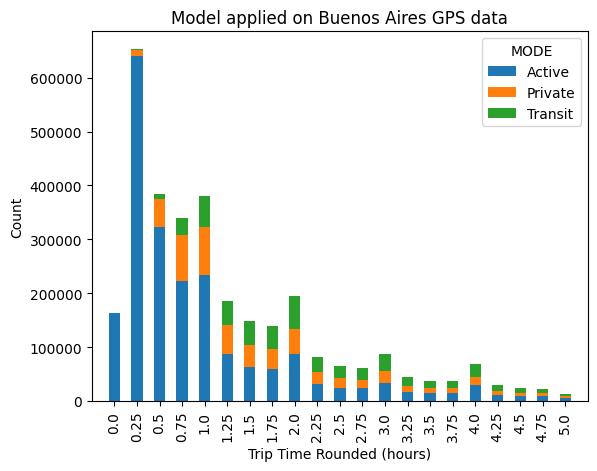

In [110]:
aa = Xy_GPS [['Trip_TravelTime_Length_hour','MODE']].copy()
aa['trip_time_rounded'] = (4 * aa['Trip_TravelTime_Length_hour']).round() / 4
bb = aa.groupby(['trip_time_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='trip_time_rounded', columns='MODE', values='Trip_TravelTime_Length_hour')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Time Rounded (hours)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 21])

# Set the title of the chart
ax.set_title('Model applied on Buenos Aires GPS data')

# Show the chart
plt.show()

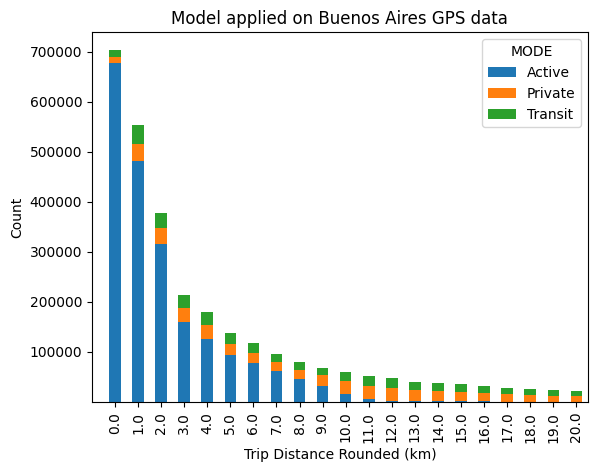

In [111]:
aa = Xy_GPS [['distance','MODE']].copy()
aa['distance_rounded'] = aa['distance'].round()
bb = aa.groupby(['distance_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='distance_rounded', columns='MODE', values='distance')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Distance Rounded (km)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 20.5])

# Set the title of the chart
ax.set_title('Model applied on Buenos Aires GPS data')

# Show the chart
plt.show()